In [44]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('./day-25-feature-scaling-normalization-wine_data.csv')
df = df.iloc[:, 0:3]
df.columns = ['Class_label', 'alcohol', 'malic_acid']
df

,Class_label,alcohol,malic_acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='alcohol', ylabel='Density'>

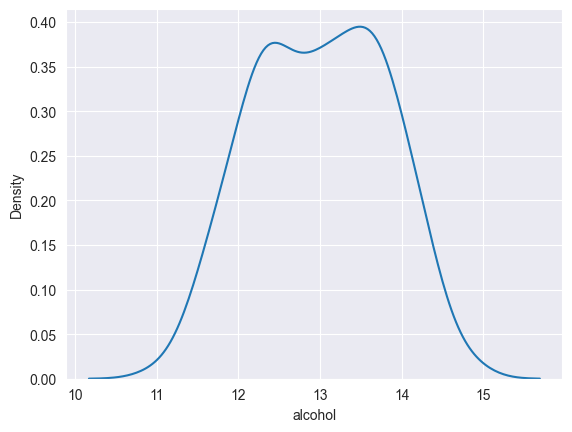

In [46]:
sns.kdeplot(df['alcohol'])

/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='malic_acid', ylabel='Density'>

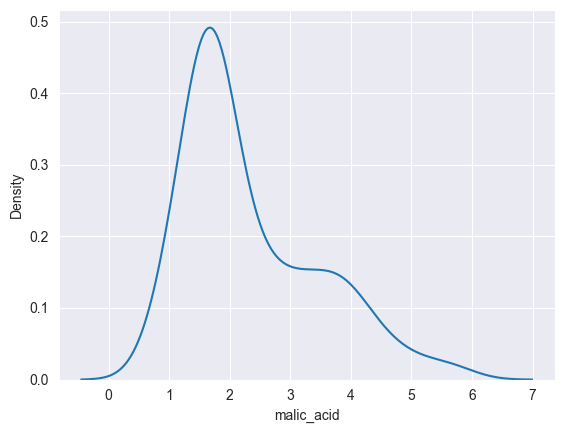

In [37]:
sns.kdeplot(df['malic_acid'])

/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='alcohol', ylabel='malic_acid'>

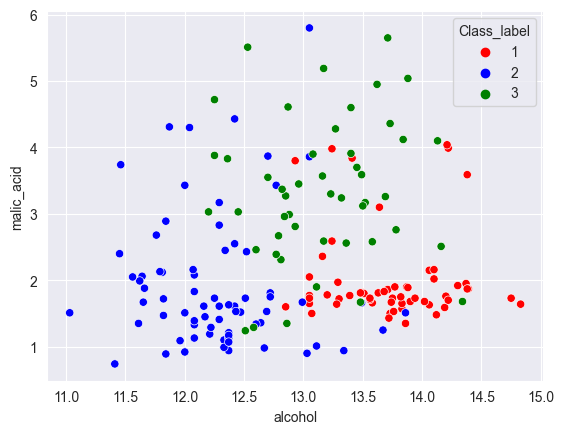

In [54]:
colors = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(x=df['alcohol'], y=df['malic_acid'], hue=df['Class_label'], palette=colors)

In [124]:
from sklearn.model_selection import train_test_split

features = df.drop('Class_label', axis='columns')
labels = df['Class_label']
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=False)

x_train.shape, x_test.shape

((123, 2), (54, 2))

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train & test sets 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [131]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [187]:
described_df = pd.concat([np.round(x_train.describe(), 1), np.round(x_train_scaled.describe(), 1)], axis='columns')
described_df.columns = ['alcohol', 'malic_acid', 'alcohol_scaled', 'malic_acid_scaled']
described_df

,alcohol,malic_acid,alcohol_scaled,malic_acid_scaled
count,123.0,123.0,123.0,123.0
mean,13.0,2.3,0.5,0.3
std,0.8,1.2,0.2,0.2
min,11.0,0.9,0.0,0.0
25%,12.4,1.6,0.4,0.1
50%,13.0,1.8,0.5,0.2
75%,13.6,3.1,0.7,0.4
max,14.8,5.8,1.0,1.0


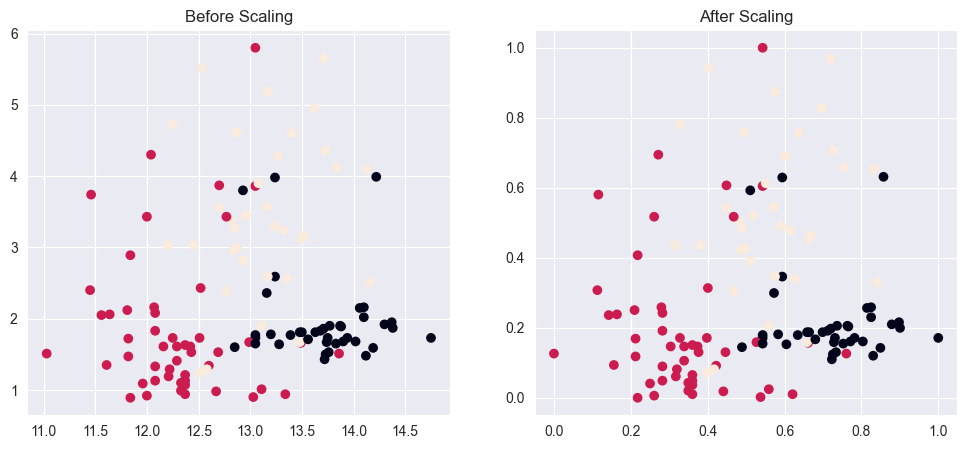

In [192]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
ax1.scatter(x_train['alcohol'], x_train['malic_acid'],c=y_train)

ax2.set_title("After Scaling")
ax2.scatter(x_train_scaled['alcohol'], x_train_scaled['malic_acid'],c=y_train)

/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

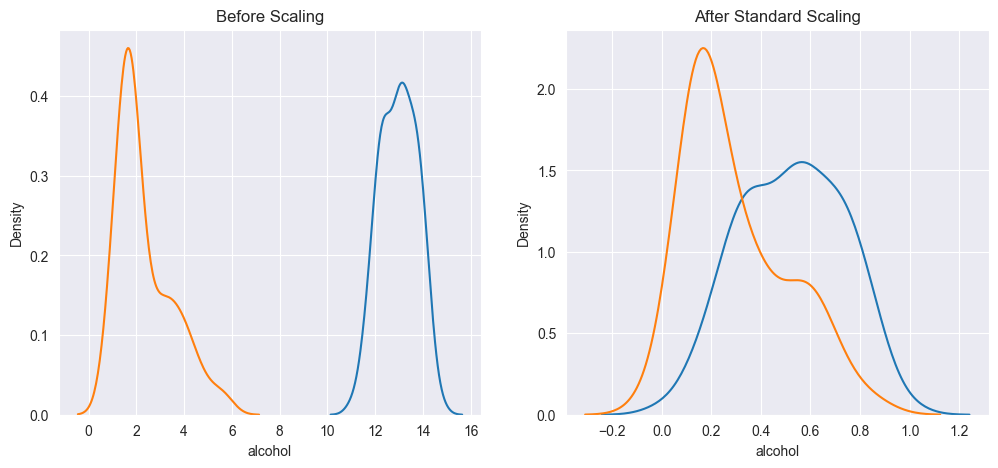

In [195]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['malic_acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_test_scaled['malic_acid'], ax=ax2)
plt.show()

/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dipen/projects/machine-learning/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

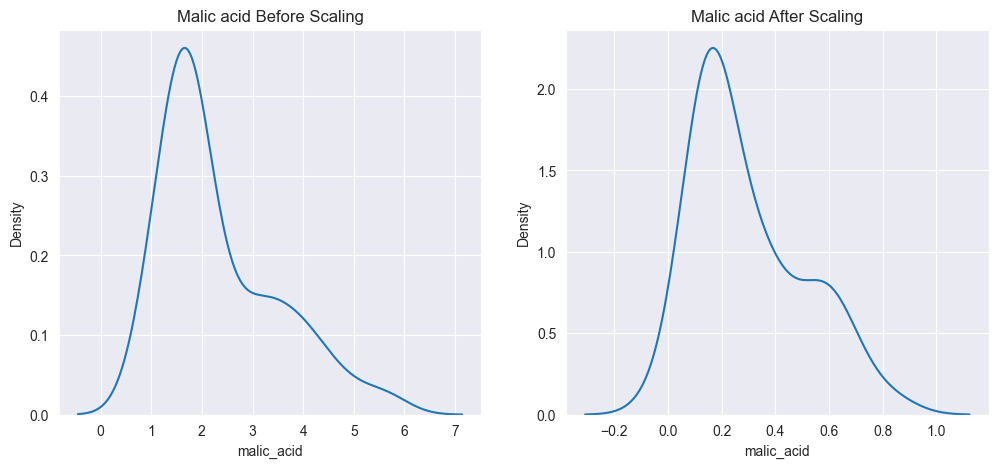

In [185]:
fix, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Before Scaling')
sns.kdeplot(x_train['malic_acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid After Scaling')
sns.kdeplot(x_test_scaled['malic_acid'], ax=ax2)

plt.show()